## Introduction

In [1]:
import DSGRN
import Berry_2019_figures_results as Berry
from min_interval_posets import posets, poset_distance
from copy import deepcopy
from numpy import linspace
from IPython import display
import matplotlib.pyplot as plt
# from matplotlib import cm
from importlib import reload
from matplotlib import rc
rc('text', usetex=True)
fontsize=20
rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
rc('legend', fontsize=12)    # legend fontsize
%matplotlib inline

In [2]:
wt1_file = "WT1_WT2_microarray_interpolated/wt1_microarray_coregenes_lifepoints_interpol_trim.csv"
wt2_file = "WT1_WT2_microarray_interpolated/wt2_microarray_coregenes_lifepoints_interpol.csv"


In [3]:
# graph data
def make_fig(fname,savename,start_time=None,end_time=None,names=None):
    curves = Berry.row(fname)
    subset_curves = deepcopy(curves)
    if names is not None:
        for name in curves:
            if name not in names:
                subset_curves.pop(name)
    for name,curve in sorted(subset_curves.items()):
        n = curve.normalize()
        if start_time is not None and end_time is not None:
            n = curve.trim(start_time,end_time)
        times,vals = zip(*n.items())
        plt.plot(times,vals,label=r"${}$".format(name))
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylabel(r"\textbf{normalized expression}")
    plt.xlabel(r"\textbf{time points}")
    plt.savefig(savename,bbox_extra_artists=(lgd,), bbox_inches='tight') 
    plt.savefig(savename, bbox_inches='tight') 
    display.display(plt.show())
    return [name for name in sorted(curves)]
    

In [4]:
start_time = 26
end_time = 170
names = ["CDC20"]
epsilons = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]



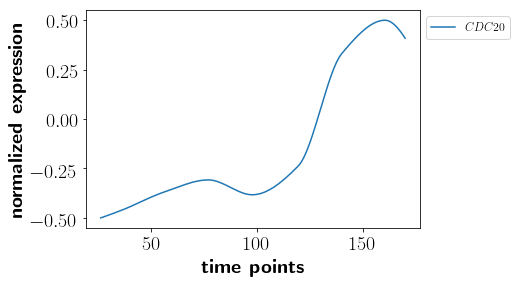

None

In [5]:
_ = make_fig(wt1_file,"time_series_wt1_{}_trimmed.pdf".format(names[0]),start_time,end_time,names)
# _ = make_fig(wt2_file,"time_series_rep2_trimmed.pdf",start_time,end_time,names)

In [6]:
intervals = Berry.getintervals(wt1_file,"row",epsilons,names,start_time,end_time)
for intv in intervals[names[0]]:
    print(intv)

(0.0, [((26.0, 26.0), ('CDC20', 'min')), ((77.0, 77.0), ('CDC20', 'max')), ((98.0, 98.0), ('CDC20', 'min')), ((160.0, 160.0), ('CDC20', 'max')), ((170.0, 170.0), ('CDC20', 'min'))])
(0.01, [((26.0, 32.0), ('CDC20', 'min')), ((66.0, 84.0), ('CDC20', 'max')), ((90.0, 105.0), ('CDC20', 'min')), ((154.0, 165.0), ('CDC20', 'max')), ((168.0, 170.0), ('CDC20', 'min'))])
(0.02, [((26.0, 37.0), ('CDC20', 'min')), ((61.0, 88.0), ('CDC20', 'max')), ((86.0, 109.0), ('CDC20', 'min')), ((151.0, 167.0), ('CDC20', 'max')), ((167.0, 170.0), ('CDC20', 'min'))])
(0.03, [((26.0, 41.0), ('CDC20', 'min')), ((56.0, 92.0), ('CDC20', 'max')), ((82.0, 111.0), ('CDC20', 'min')), ((149.0, 169.0), ('CDC20', 'max')), ((165.0, 170.0), ('CDC20', 'min'))])
(0.04, [((26.0, 45.0), ('CDC20', 'min')), ((147.0, 170.0), ('CDC20', 'max')), ((163.0, 170.0), ('CDC20', 'min'))])
(0.05, [((26.0, 49.0), ('CDC20', 'min')), ((145.0, 170.0), ('CDC20', 'max'))])


In [7]:
def makeboxes(intervals,start_time,end_time,savename="intervals_CDC20.pdf"):
    marker = "s"
    for k,i in enumerate(intervals):
        eps = i[0]
        ints = i[1]
        for j in ints:
            xl = (int(j[0][0]),int(j[0][1])+1)
            x = list(range(*xl))
            if j[1][1] == "min":
                color = "k"
            else:
                color = "r"
            if len(x) == 1:
                alpha = 0.25
            else:
                alpha = 0.1
            plt.plot(x,[eps]*len(x),linestyle=None,marker=marker,color=color,alpha=alpha)
#     plt.xlim(start_time,end_time) 
    plt.yticks(epsilons)
    plt.ylabel(r"$\mbox{{\Huge$\epsilon$}}$")
    plt.xlabel(r"\textbf{time points}")
    plt.savefig(savename, bbox_inches='tight') 
    display.display(plt.show())
            
    
    


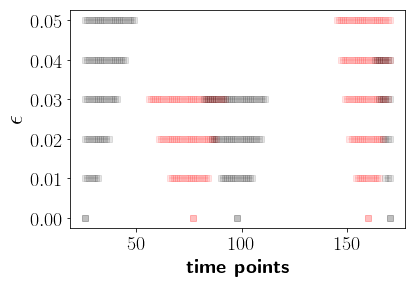

None

In [8]:
makeboxes(intervals[names[0]],start_time,end_time)

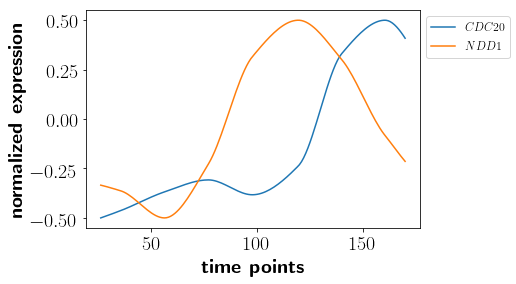

None

In [9]:
names = ["CDC20","NDD1"]
epsilons = [0.0,0.03,0.05]
_ = make_fig(wt1_file,"time_series_wt1_{}_{}_trimmed.pdf".format(names[0],names[1]),start_time,end_time,names)

posets1 = Berry.getposets(wt1_file,"row",epsilons,names,start_time,end_time)



In [10]:
network = DSGRN.Network("\n".join(["{} : {}".format(name,name) for name in names]))
network.specification()

'CDC20 : CDC20\nNDD1 : NDD1'

In [11]:
def make_posets(p,network):
    events = list(p[1][0])
    event_ordering = list(p[1][1]) 
    poe = DSGRN.PosetOfExtrema(network, events, event_ordering)
    return poe,p[0]

Epsilon = 0.0


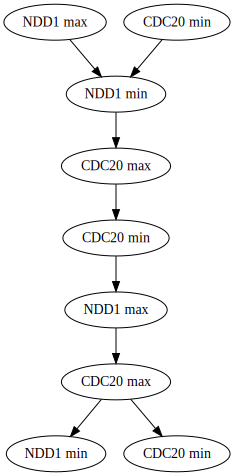

Epsilon = 0.03


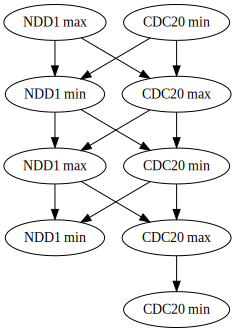

Epsilon = 0.05


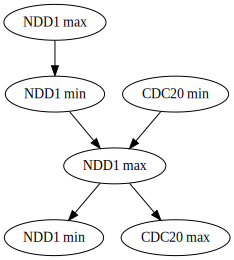

In [12]:
for p in posets1:
    poe, eps = make_posets(p,network)
    print("Epsilon = {}".format(eps))
    display.display(DSGRN.DrawGraph(poe))
    with open("poset_intro_{}.dot".format(int(100*eps)),"w") as f:
        f.write(poe.graphviz())